# Data Visualization

# Loading the Data

In [ ]:
!wget https://github.com/vitsiupia/business-meetings-summarization/raw/main/longformer/data/ami_meetings_csv_files/ami_meetings_train.csv
!wget https://github.com/vitsiupia/business-meetings-summarization/raw/main/longformer/data/ami_meetings_csv_files/ami_meetings_val.csv
!wget https://github.com/vitsiupia/business-meetings-summarization/raw/main/longformer/data/ami_meetings_csv_files/ami_meetings_test.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import nltk
from nltk.corpus import stopwords
from scipy import stats
import statsmodels.api as sm 
from wordcloud import WordCloud, STOPWORDS
import string
%matplotlib inline

# custom palette for plots
custom_palette = ['#b388eb', '#8093f1', '#72ddf7']

In [3]:
train_data=pd.read_csv('ami_meetings_train.csv')
val_data=pd.read_csv('ami_meetings_val.csv')
test_data=pd.read_csv('ami_meetings_test.csv')

train_data

,transcript,summary,meeting_id
0,yep . well there ' s a wee a wee plug just jus...,the project manager opened the meeting and sta...,ES2008b
1,is it an only a single mic or a microphone arr...,the user interface designer and the industrial...,IS1007d
2,i could could the middle button of the on - sc...,the project manager recapped the decisions mad...,ES2008d
3,okay . right . conceptual design meeting . rig...,the project manager reviewed the minutes from ...,ES2014c
4,just put it on the deskt desktop . project doc...,the project manager recapped the events of the...,ES2003b
...,...,...,...
108,"okay . okay . oh , okay . yeah . yeah , and or...",the project manager presented the agenda and t...,TS3004d
109,is that alright ? or okay . keeps coming off ....,the project manager introduced the upcoming pr...,ES2007a
110,' kay . hmm . okay everybody . welcome to the ...,the project manager reviewed the minutes from ...,ES2011d
111,"no , you ' ll ha have to open it up from elsew...",the first prototype for the remote control was...,ES2014d


In [4]:
test_data.head()

,transcript,meeting_id
0,okay . mm - hmm . okay . okay . mm - hmm . oka...,IN1008
1,"if not more , yeah . okay . okay . so the thre...",EN2004a
2,"so if you ' ve um if you ' re back to a page ,...",EN2003a
3,"yeah , mm - hmm . hmm . thank you . no , i don...",EN2005a
4,"yeah . yeah , i mean if we just want to have u...",EN2001a


Before making any changes to the dataframes, let's concatenate them to make comparative visualizations for each of the sets.

In [5]:
train_data['split'] = 'train'
val_data['split'] = 'val'
test_data.insert(1, 'summary', '')  # add a missing column before concatenating
test_data['split'] = 'test'

In [6]:
data = pd.concat([train_data, val_data, test_data], ignore_index=True)
data

,transcript,summary,meeting_id,split
0,yep . well there ' s a wee a wee plug just jus...,the project manager opened the meeting and sta...,ES2008b,train
1,is it an only a single mic or a microphone arr...,the user interface designer and the industrial...,IS1007d,train
2,i could could the middle button of the on - sc...,the project manager recapped the decisions mad...,ES2008d,train
3,okay . right . conceptual design meeting . rig...,the project manager reviewed the minutes from ...,ES2014c,train
4,just put it on the deskt desktop . project doc...,the project manager recapped the events of the...,ES2003b,train
...,...,...,...,...
166,no . yep . uh you can be sitting here itself a...,,IN1002,test
167,did we get seven out of ten for the other one ...,,EN2002c,test
168,okay . yeah . i mean m my view on this was tha...,,EN2009b,test
169,okay . mm - hmm . or actually look at the pitc...,,IN1009,test


# Visualizing the Data

## Word Clouds

Word clouds are primarily used to gain insights into the most common or significant words within a text or document collection. They can help identify key themes, topics, or trends by visually highlighting the most frequently occurring words. Let's see what they will look like for our transcripts and summaries.

In [7]:
stopwords_wc = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords_wc,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

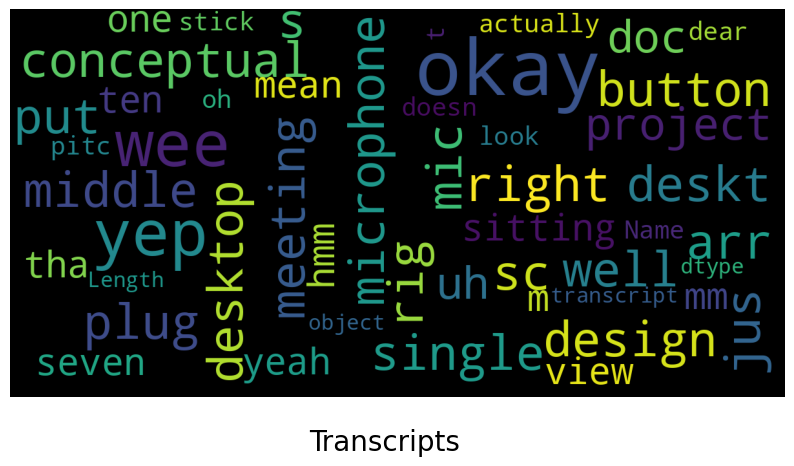

In [8]:
show_wordcloud(data['transcript'], title='Transcripts')

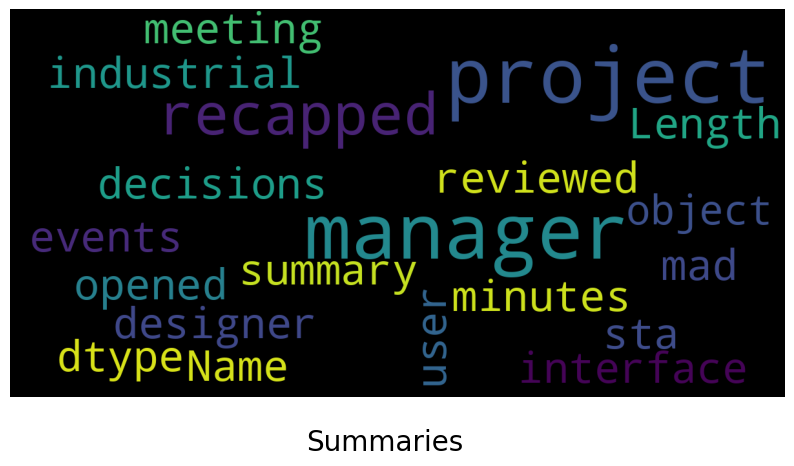

In [31]:
show_wordcloud(data['summary'], title='Summaries')

## Number of Words or Characters in Transcripts and Summaries

In [10]:
data['tran_word_length']=data['transcript'].apply(lambda text: len(text.split(" ")))
data['tran_char_length']=data['transcript'].apply(len)

In [11]:
data['sum_word_length']=data['summary'].apply(lambda text: len(text.split(" ")) if len(text.split(" ")) != 1 else 0 )
data['sum_char_length']=data['summary'].apply(len)

In [12]:
data

,transcript,summary,meeting_id,split,tran_word_length,tran_char_length,sum_word_length,sum_char_length
0,yep . well there ' s a wee a wee plug just jus...,the project manager opened the meeting and sta...,ES2008b,train,7603,33430,147,862
1,is it an only a single mic or a microphone arr...,the user interface designer and the industrial...,IS1007d,train,6144,27191,219,1288
2,i could could the middle button of the on - sc...,the project manager recapped the decisions mad...,ES2008d,train,10235,43117,219,1264
3,okay . right . conceptual design meeting . rig...,the project manager reviewed the minutes from ...,ES2014c,train,8000,35206,215,1227
4,just put it on the deskt desktop . project doc...,the project manager recapped the events of the...,ES2003b,train,7008,31126,148,907
...,...,...,...,...,...,...,...,...
166,no . yep . uh you can be sitting here itself a...,,IN1002,test,9510,41233,0,0
167,did we get seven out of ten for the other one ...,,EN2002c,test,13857,57537,0,0
168,okay . yeah . i mean m my view on this was tha...,,EN2009b,test,10657,43888,0,0
169,okay . mm - hmm . or actually look at the pitc...,,IN1009,test,3638,15231,0,0


In [13]:
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 

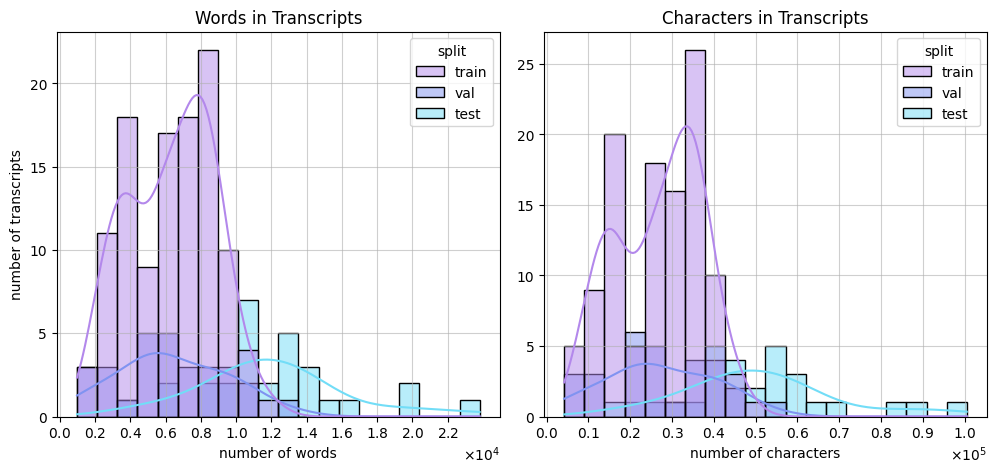

In [14]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.1)

# histogram of number of words in transcripts
plt.subplot(121, xlabel='number of words', ylabel='number of transcripts', title='Words in Transcripts')
sns.histplot(data=data, x='tran_word_length', stat='count', kde=True, bins=20, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['tran_word_length'].max(), 2e3))
plt.gca().xaxis.set_major_formatter(formatter) 
plt.gca().grid(True, alpha=.6)

# histogram of character lengths in transcripts
plt.subplot(122, xlabel='number of characters', ylabel=' ', title='Characters in Transcripts')
sns.histplot(data=data, x='tran_char_length', stat='count', kde=True, bins=20, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['tran_char_length'].max(), 1e4))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().grid(True, alpha=.6)

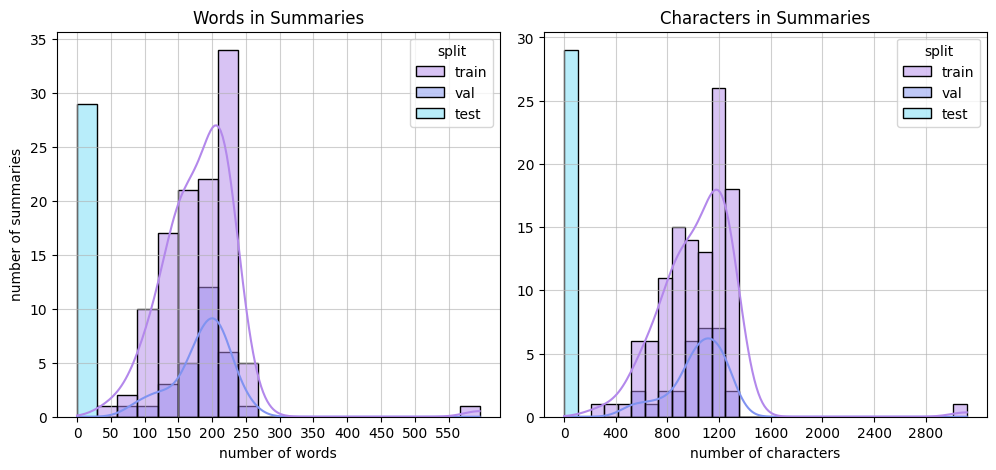

In [15]:
plt.figure(figsize=(12,5))
plt.subplots_adjust(wspace=0.1)

# histogram of number of words in summaries
plt.subplot(121, xlabel='number of words', ylabel='number of summaries', title='Words in Summaries')
sns.histplot(data=data, x='sum_word_length', stat='count', kde=True, bins=20, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['sum_word_length'].max(), 50))
plt.gca().grid(True, alpha=.6)

# histogram of number of characters in summaries
plt.subplot(122, xlabel='number of characters', ylabel=' ', title='Characters in Summaries')
sns.histplot(data=data, x='sum_char_length', stat='count', kde=True, bins=30, hue='split', palette=custom_palette)
plt.gca().set_xticks(np.arange(0, data['sum_char_length'].max(), 400))
# plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().grid(True, alpha=.6)

## Stop Words Count

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def stopwords_count(text):
    stopwords_list = stopwords.words('english') 
    # take into account words from stopwords_list and lone letters like 'k','o','h','y'
    return len([words for words in str(text).lower().split() if words in stopwords_list or len(words)==1])

In [18]:
data['tran_stopwords_cnt']=data['transcript'].apply(stopwords_count)
data['sum_stopwords_cnt']=data['summary'].apply(stopwords_count)
data

,transcript,summary,meeting_id,split,tran_word_length,tran_char_length,sum_word_length,sum_char_length,tran_stopwords_cnt,sum_stopwords_cnt
0,yep . well there ' s a wee a wee plug just jus...,the project manager opened the meeting and sta...,ES2008b,train,7603,33430,147,862,4655,67
1,is it an only a single mic or a microphone arr...,the user interface designer and the industrial...,IS1007d,train,6144,27191,219,1288,3812,110
2,i could could the middle button of the on - sc...,the project manager recapped the decisions mad...,ES2008d,train,10235,43117,219,1264,6425,116
3,okay . right . conceptual design meeting . rig...,the project manager reviewed the minutes from ...,ES2014c,train,8000,35206,215,1227,4858,100
4,just put it on the deskt desktop . project doc...,the project manager recapped the events of the...,ES2003b,train,7008,31126,148,907,4197,66
...,...,...,...,...,...,...,...,...,...,...
166,no . yep . uh you can be sitting here itself a...,,IN1002,test,9510,41233,0,0,5897,0
167,did we get seven out of ten for the other one ...,,EN2002c,test,13857,57537,0,0,8999,0
168,okay . yeah . i mean m my view on this was tha...,,EN2009b,test,10657,43888,0,0,6772,0
169,okay . mm - hmm . or actually look at the pitc...,,IN1009,test,3638,15231,0,0,2243,0


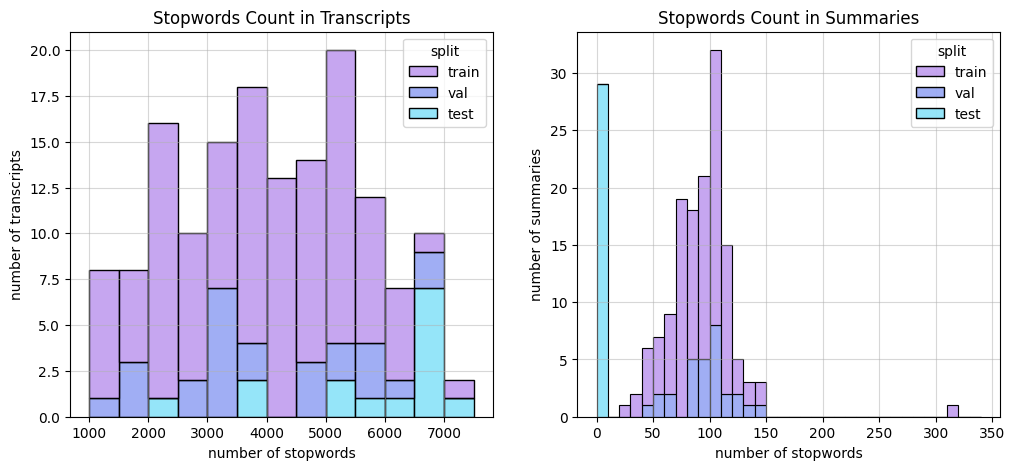

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=data, x='tran_stopwords_cnt', bins=np.arange(1e3, 8e3, 500), hue='split', multiple='stack', palette=custom_palette, ax=ax[0])
ax[0].grid(True, alpha=.5)
ax[0].set(title='Stopwords Count in Transcripts', xlabel='number of stopwords', ylabel='number of transcripts')

sns.histplot(data=data, x='sum_stopwords_cnt', bins=np.arange(0, 350, 10), hue='split', multiple='stack', palette=custom_palette, ax=ax[1])
ax[1].grid(True, alpha=.5)
ax[1].set(title='Stopwords Count in Summaries', xlabel='number of stopwords', ylabel='number of summaries');

In the first plot, we see that the number of stopwords exceeds our expectations and sometimes even reaches 7K, with around 5K on average, which can be compared with the whole number of words in transcripts. From the second plot we notice that both train and val follow the same pattern, except that they contain different numbers of texts, and there are around 100 stopwords in summaries in train and val sets.

## The Most Frequent Words

In [20]:
data.transcript.tolist()[0]

"yep . well there ' s a wee a wee plug just just that one there ah that ' s it , yep . and then you have to press function f_ eight i think it is on your laptop . that ' s it . repetitive strain injury . repetitive strain injury . so if you cheers . here we go . right so i ' m gonna talk about the technical technical functions design of the remote control um . we need to start by considering what a remote control actually is . it ' s a device that allows us to produce certain effects on our television , so i it ' s basically a communication device . we we tell the remote control what we want to do , it sends a message to the television saying change the channel , change the volume , uh yeah , adjust these settings , adjust the brightness . um how do we actually go about designing a new television remote control ? first thing to do is to come up with the design specifications . we need to know what our final product is gonna be like , so we need a a clear idea of exactly what this produ

In [21]:
flattened_transcripts = []
for transc in data.transcript.tolist():
    flattened_transcripts.extend(transc.split())
flattened_transcripts[:10]

['yep', '.', 'well', 'there', "'", 's', 'a', 'wee', 'a', 'wee']

In [22]:
stopwords_list = stopwords.words('english') 

cleaned_flattened_transcripts = []
for transc in data.transcript.tolist():
    # Remove punctuation using string.punctuation
    text_no_punct = transc.translate(str.maketrans("", "", string.punctuation))
    
    # Remove extra spaces and split into individual words
    words = text_no_punct.split()
    cleaned_flattened_transcripts.extend(words)
    
# filter stopwords and lone letters in text
cleaned_flattened_transcripts = [word for word in cleaned_flattened_transcripts if word not in stopwords_list or len(word)!=1]

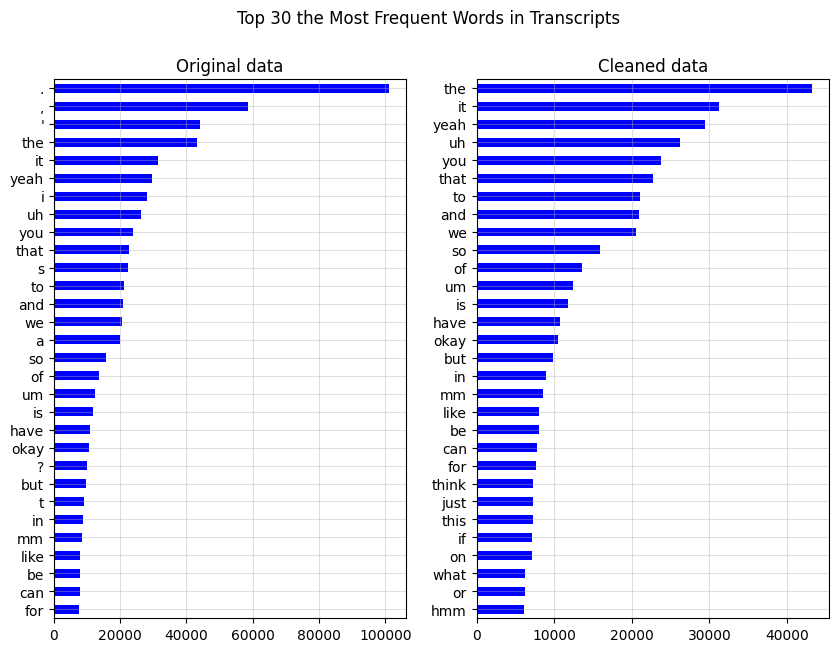

In [23]:
# one with stopwords & punctuation
fig = plt.figure(figsize=(10,7))
plt.suptitle('Top 30 the Most Frequent Words in Transcripts')

plt.subplot(121, title='Original data')
pd.Series(flattened_transcripts).value_counts()[:30].sort_values(ascending=True).plot(kind='barh', cmap='brg')
plt.grid(True, alpha=0.4)  

# one w/o lone leters, stopwords & punctuation
plt.subplot(122, title='Cleaned data')
pd.Series(cleaned_flattened_transcripts).value_counts()[:30].sort_values(ascending=True).plot(kind='barh', cmap='brg')  
plt.grid(True, alpha=0.4)  

## Scatterplots

Now using scatterplot to check if there is any relation b/w char count and word count,as shown below there is positive relation that means if char count increases the word count increases.

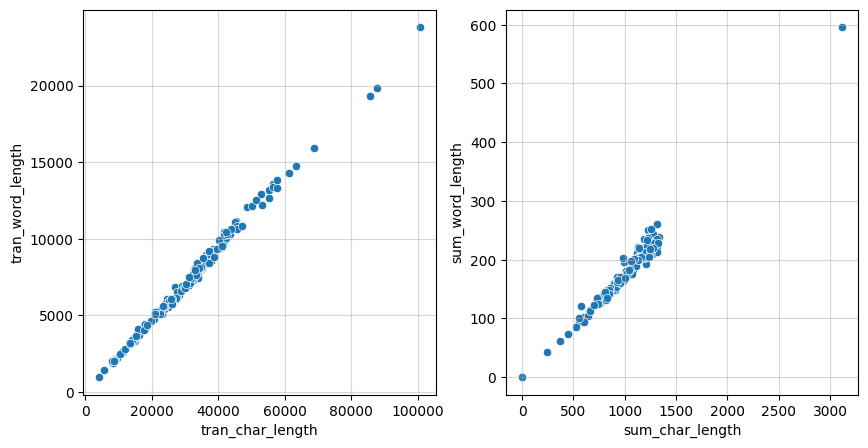

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(x='tran_char_length',y='tran_word_length',data=data)
plt.grid(alpha=0.5)

plt.subplot(122)
sns.scatterplot(x='sum_char_length',y='sum_word_length',data=data)
plt.grid(alpha=0.5)

Now we use plobability plot to see if they are normally distributed or not.

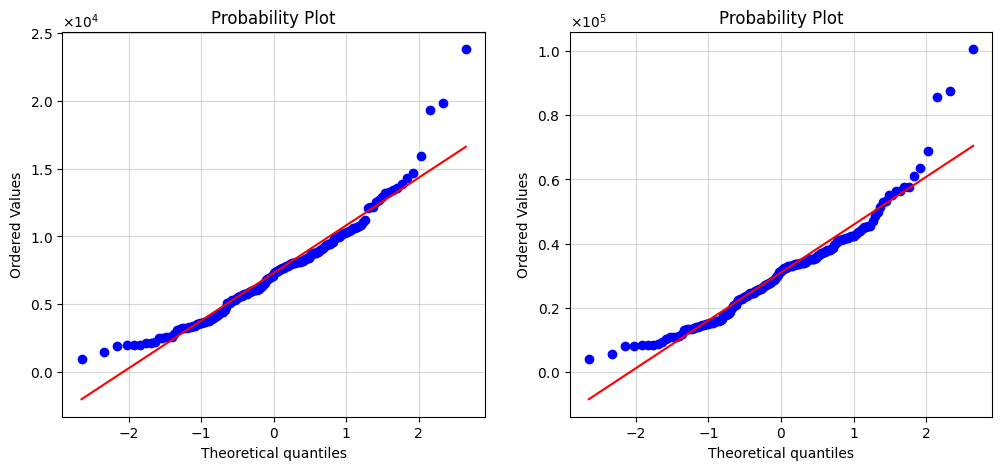

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(121)
stats.probplot(data['tran_word_length'], plot=plt)
plt.gca().grid(True, alpha=.5)
plt.gca().yaxis.set_major_formatter(formatter) 

plt.subplot(122, ylabel=' ')
stats.probplot(data['tran_char_length'], plot=plt)
plt.gca().grid(True, alpha=.5)
plt.gca().yaxis.set_major_formatter(formatter) 

## Unique words in transcripts

In [26]:
data['tran_unique_word_count'] =data['transcript'].apply(lambda x: len(set(str(x).split())))
data['sum_unique_word_count'] =data['summary'].apply(lambda x: len(set(str(x).split())))

<Axes: xlabel='sum_unique_word_count', ylabel='Count'>

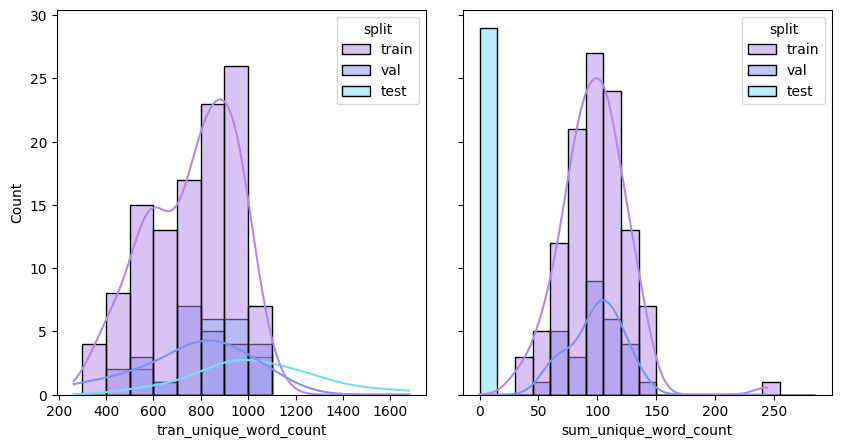

In [27]:
fig, ax = plt.subplots(1,2,sharey=True, figsize=(10,5))
plt.subplots_adjust(wspace=.1)

# trascripts
plt.subplot(121)
sns.histplot(data=data, x='tran_unique_word_count', stat='count', bins=np.arange(300, 1200, 100), 
             kde=True, ax=ax[0], hue='split', palette=custom_palette)

# summaries
plt.subplot(122)
sns.histplot(data=data, x='sum_unique_word_count', stat='count', bins=np.arange(0, 300, 15), 
             kde=True, ax=ax[1], hue='split', palette=custom_palette)

<Axes: xlabel='tran_char_length', ylabel='tran_unique_word_count'>

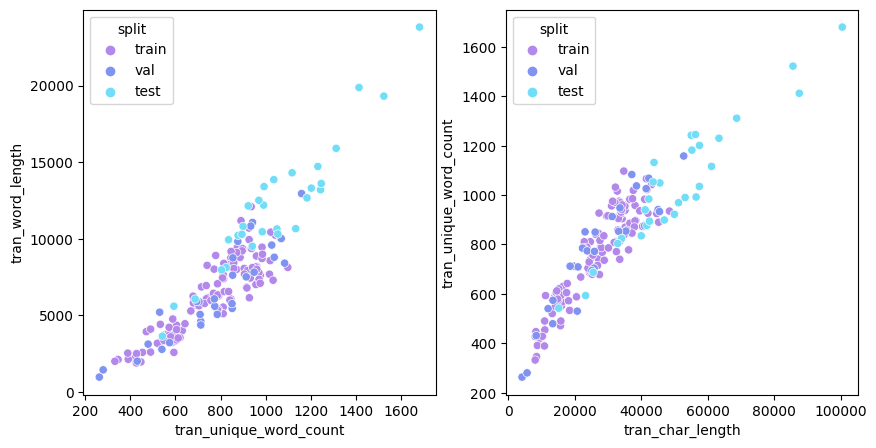

In [28]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(x='tran_unique_word_count',y='tran_word_length',data=data, hue='split', palette=custom_palette)

plt.subplot(122)
sns.scatterplot(x='tran_char_length',y='tran_unique_word_count',data=data, hue='split', palette=custom_palette)

<Axes: xlabel='sum_char_length', ylabel='sum_unique_word_count'>

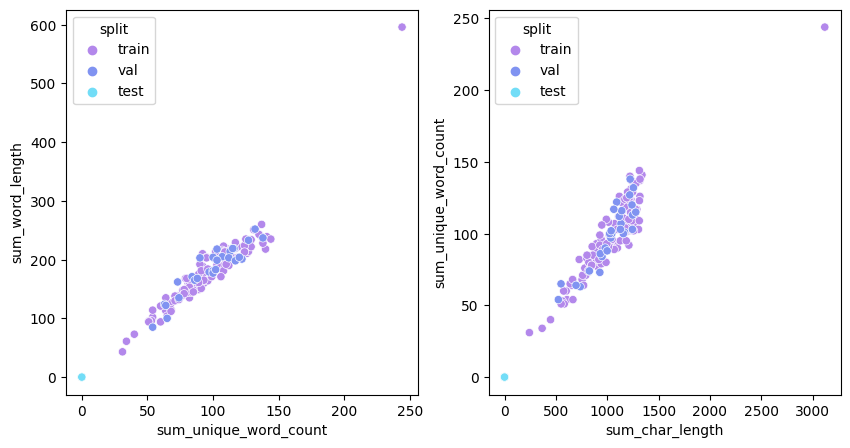

In [29]:
plt.figure(figsize=(10,5))

plt.subplot(121)
sns.scatterplot(x='sum_unique_word_count',y='sum_word_length',data=data, hue='split', palette=custom_palette)

plt.subplot(122)
sns.scatterplot(x='sum_char_length',y='sum_unique_word_count',data=data, hue='split', palette=custom_palette)

## Correlation matrix

<ipython-input-30-6dec2a0c1784>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f');


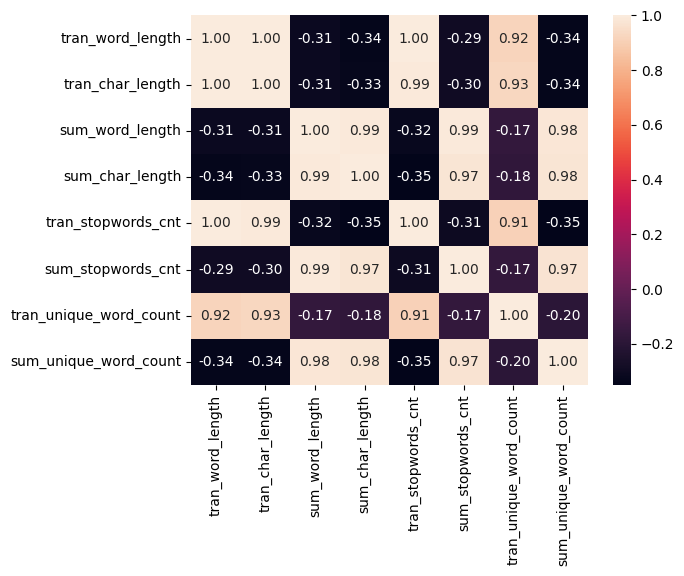

In [30]:
sns.heatmap(data.corr(), annot=True, fmt='.2f');